# EDA

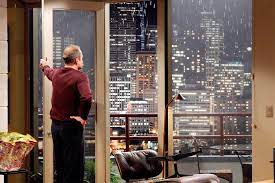

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# EDA — King County House Sales
**Klient:** Erin Robinson (Buyer)  
**Cel:** znaleźć inwestycje zgodne z profilem: "inwestować w biedniejsze dzielnice, kupować & sprzedawać, odzyskiwać koszty + niewielki zysk, społecznie odpowiedzialne".  
**Autor:** [Twoje imię]  
**Data:** <wstaw datę>

## Spis treści


Erin Robinson    Buyer    Invest in poor neighborhood, buying & selling, costs back + little profit, socially responsible

In [2]:
#cleaning the data 
df_sales = pd.read_csv('data/king_county_haus_sales.csv')
df_details = pd.read_csv('data/king_county_haus_details.csv')
df_sales_details_combined = df_sales.merge(df_details, left_on="house_id", right_on="id", how="inner")
df_sales_details_combined.head()




,date,price,house_id,id_x,id_y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


In [3]:
df_sales_details_combined.tail()

,date,price,house_id,id_x,id_y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,2014-05-21,360000.000,263000018,21593,263000018,3.000,2.500,1530.000,1131.000,3.000,...,8,1530.000,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000
21593,2015-02-23,400000.000,6600060120,21594,6600060120,4.000,2.500,2310.000,5813.000,2.000,...,8,2310.000,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000
21594,2014-06-23,402101.000,1523300141,21595,1523300141,2.000,0.750,1020.000,1350.000,2.000,...,7,1020.000,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000
21595,2015-01-16,400000.000,291310100,21596,291310100,3.000,2.500,1600.000,2388.000,2.000,...,8,1600.000,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000
21596,2014-10-15,325000.000,1523300157,21597,1523300157,2.000,0.750,1020.000,1076.000,2.000,...,7,1020.000,0.000,2008,0.000,98144,47.594,-122.299,1020.000,1357.000


In [4]:
df_sales_details_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id_x           21597 non-null  int64  
 4   id_y           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [5]:
df_sales_details_combined.describe()


,price,house_id,id_x,id_y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,...,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,10799.000,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,...,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,2876735715.748,6234.661,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,...,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1000102.000,1.000,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,2123049175.000,5400.000,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3904930410.000,10799.000,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,7308900490.000,16198.000,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,...,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,9900000190.000,21597.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,...,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


In [6]:
#checking for duplicates
df_sales_details_combined.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [25]:
#checking data types
df_sales_details_combined.dtypes

date             datetime64[ns]
price                   float64
house_id                  int64
id_x                      int64
id_y                      int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront               object
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated              Int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
dtype: object

In [8]:
#change date format
df_sales_details_combined['date'] = pd.to_datetime(df_sales_details_combined['date'], format='%Y-%m-%d')
type(df_sales_details_combined['date'][0])


pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df_sales_details_combined['yr_renovated'] = df_sales_details_combined['yr_renovated'].replace(0, np.nan)
df_sales_details_combined.head()

,date,price,house_id,id_x,id_y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,NaN,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,NaN,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,NaN,98074,47.617,-122.045,1800.000,7503.000


In [10]:
df_sales_details_combined['yr_built'] = df_sales_details_combined['yr_built'].astype(int)


In [11]:
df_sales_details_combined['yr_renovated'] = df_sales_details_combined['yr_renovated'].replace(0, np.nan)
df_sales_details_combined['yr_renovated'].head()



0         NaN
1   19910.000
2         NaN
3         NaN
4         NaN
Name: yr_renovated, dtype: float64

In [12]:

df_sales_details_combined['yr_renovated'] = (
    df_sales_details_combined['yr_renovated']
    .replace(0, np.nan)
    .astype(float)
    .where(lambda x: x < 10000, lambda x: x / 10)   # if ≥ 10000 → /10, otherwise unchanged
    .round(0)
    .astype('Int64')
)

df_sales_details_combined['yr_renovated'].head()



0    <NA>
1    1991
2    <NA>
3    <NA>
4    <NA>
Name: yr_renovated, dtype: Int64

In [13]:
df_sales_details_combined.head()

,date,price,house_id,id_x,id_y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,<NA>,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,1991,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,<NA>,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,<NA>,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,<NA>,98074,47.617,-122.045,1800.000,7503.000


In [14]:
import missingno as msno
#missing data

In [15]:
df_sales_details_combined.isna().sum()

date                 0
price                0
house_id             0
id_x                 0
id_y                 0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront        2391
view                63
condition            0
grade                0
sqft_above           0
sqft_basement      452
yr_built             0
yr_renovated     20853
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [16]:
df_sales_details_combined['waterfront'].unique()

array([nan,  0.,  1.])

In [17]:
df_sales_details_combined['sqft_basement'].unique()

array([   0.,  400.,  910., 1530.,   nan,  730., 1700.,  300.,  970.,
        760.,  720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,
        588., 1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,
        500., 1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,
        710.,  840.,  380.,  770.,  480.,  570., 1490.,  620., 1250.,
       1270.,  120.,  650.,  180., 1130.,  450., 1640., 1460., 1020.,
       1030.,  750.,  640., 1070.,  490., 1310.,  630., 2000.,  390.,
        430.,  850.,  210., 1430., 1950.,  440.,  220., 1160.,  860.,
        580., 2060., 1820., 1180.,  200., 1150., 1200.,  680.,  530.,
       1450., 1170., 1080.,  960.,  280.,  870., 1100.,  460., 1400.,
        660., 1220.,  900.,  420., 1580., 1380.,  475.,  690.,  270.,
        350.,  935., 1370.,  980., 1470.,  160.,  950.,   50.,  740.,
       1780., 1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,
        890., 1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800.,
       1120., 1810.,

<Axes: >

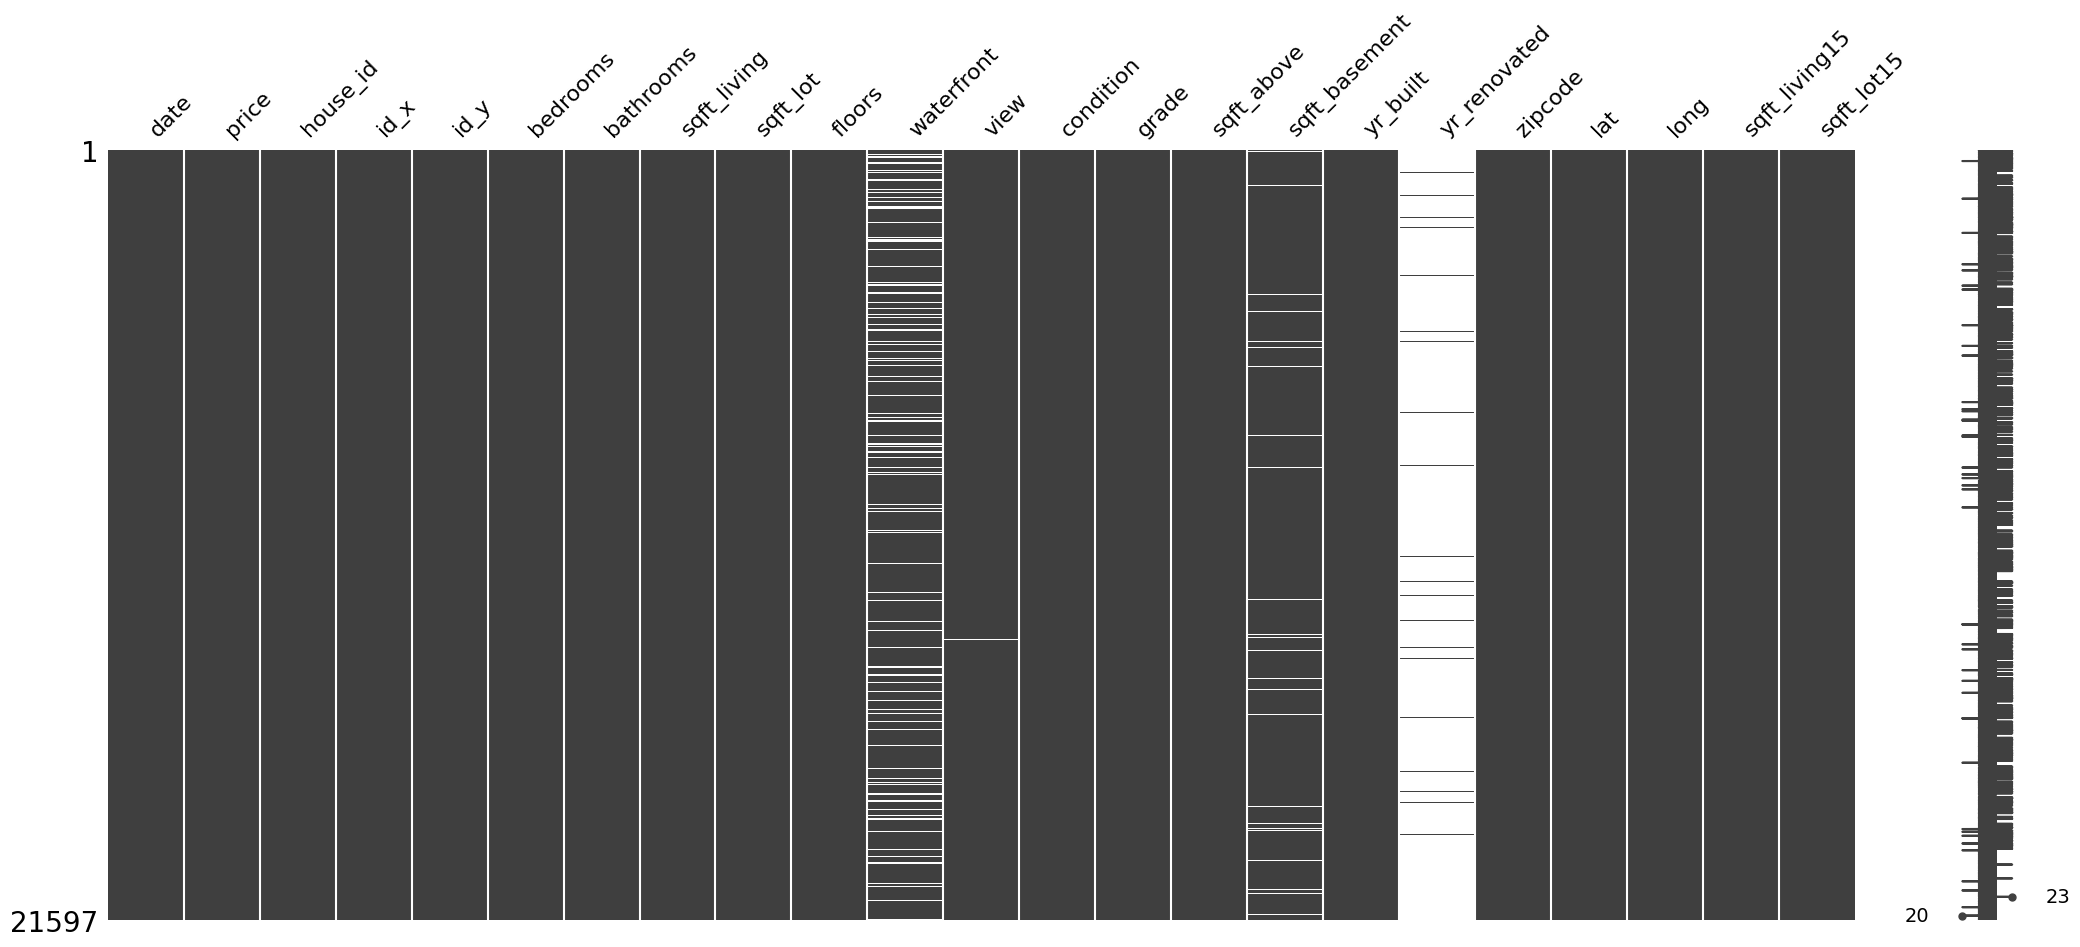

In [18]:
msno.matrix(df_sales_details_combined)

In [19]:
df_sales_details_combined['waterfront'] = df_sales_details_combined['waterfront'].replace({0: 'no', 1: 'yes'})
df_sales_details_combined['waterfront'].unique()

array([nan, 'no', 'yes'], dtype=object)

In [20]:
df = df_sales_details_combined.copy()


In [ ]:
#we are looking for the poorest neighboorhoods
zip_median = df.groupby('zipcode')['price'].median().sort_values()


In [22]:
print(zip_median)


zipcode
98002    235000.000
98168    235000.000
98032    249000.000
98001    260000.000
98188    264000.000
            ...    
98005    765475.000
98112    915000.000
98040    993750.000
98004   1150000.000
98039   1895000.000
Name: price, Length: 70, dtype: float64


In [23]:
threshold = zip_median.quantile(0.25)  # bottom 25%
poor_zipcodes = zip_median[zip_median <= threshold].index.tolist()

poor_zipcodes


[98002,
 98168,
 98032,
 98001,
 98188,
 98198,
 98003,
 98023,
 98148,
 98178,
 98022,
 98030,
 98031,
 98042,
 98055,
 98146,
 98092,
 98106]

In [34]:
avg_price_poor_zipcodes = zip_median.loc[poor_zipcodes].mean()
avg_price_poor_zipcodes

np.float64(275927.05555555556)

In [35]:
min_price = df['price'].min()
max_price = df['price'].max()

print("Minimum house price:", min_price)
print("Maximum house price:", max_price)


Minimum house price: 78000.0
Maximum house price: 7700000.0


In [ ]:
#we are adding new column poor neighboorhoods with result true or false
df['poor_neighborhood'] = df['zipcode'].isin(poor_zipcodes)


In [26]:
df_sorted = df.sort_values(
    by=['poor_neighborhood', 'price', 'condition', 'yr_built'],
    ascending=[False, True, True, True]
)


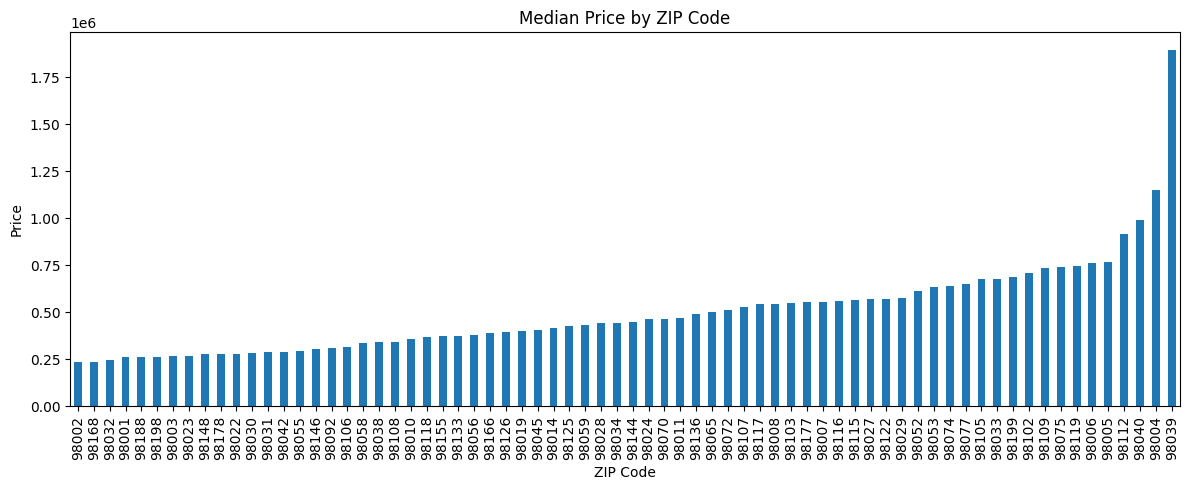

In [ ]:
#first visualization that shows a map for prices in zipcodes (poorest neighboorhoods)

zip_median.plot(kind='bar', figsize=(12,5))
plt.title("Median Price by ZIP Code")
plt.ylabel("Price")
plt.xlabel("ZIP Code")
plt.tight_layout()
plt.show()


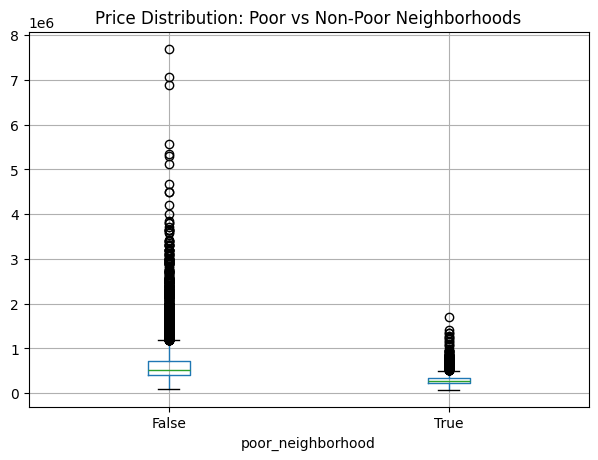

In [ ]:
#proove that poor zipcodes are the cheapest ones 
df.boxplot(column='price', by='poor_neighborhood', figsize=(7,5))
plt.title("Price Distribution: Poor vs Non-Poor Neighborhoods")
plt.suptitle("")
plt.show()


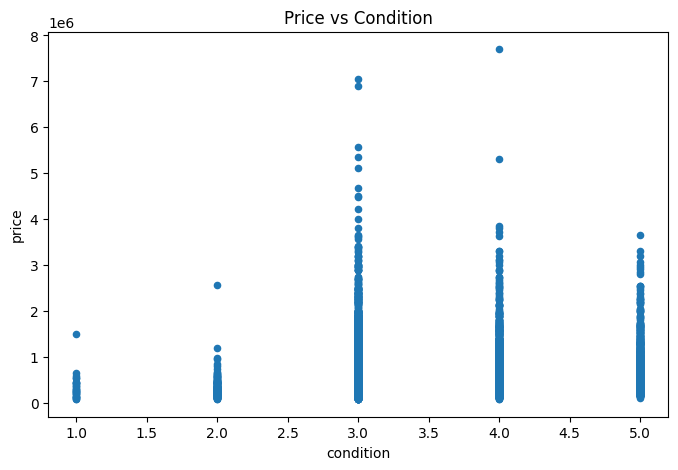

In [29]:
df.plot.scatter(x='condition', y='price')
plt.title("Price vs Condition")
plt.show()


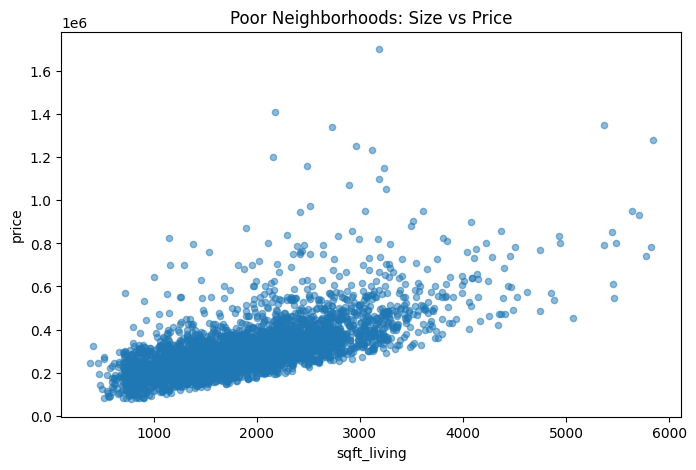

In [ ]:
#this shows us if cheap hauses are just small or in bad condition
df[df['poor_neighborhood']].plot.scatter(
    x='sqft_living', y='price', alpha=0.5
)
plt.title("Poor Neighborhoods: Size vs Price")
plt.show()


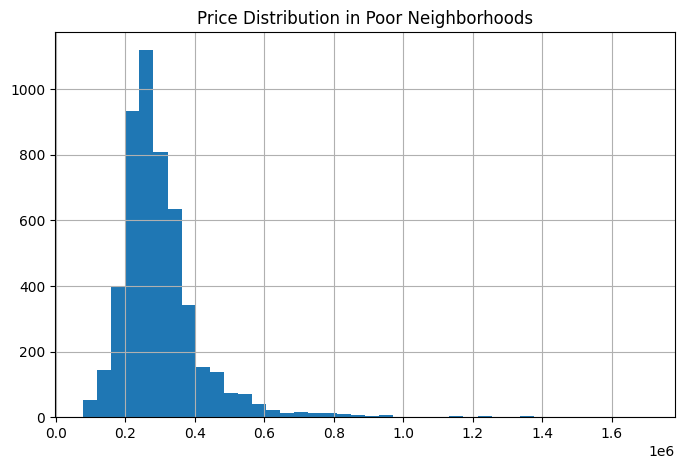

In [ ]:
# histogram of prices in poor zips (investment potential)
df[df['poor_neighborhood']]['price'].hist(bins=40)
plt.title("Price Distribution in Poor Neighborhoods")
plt.show()


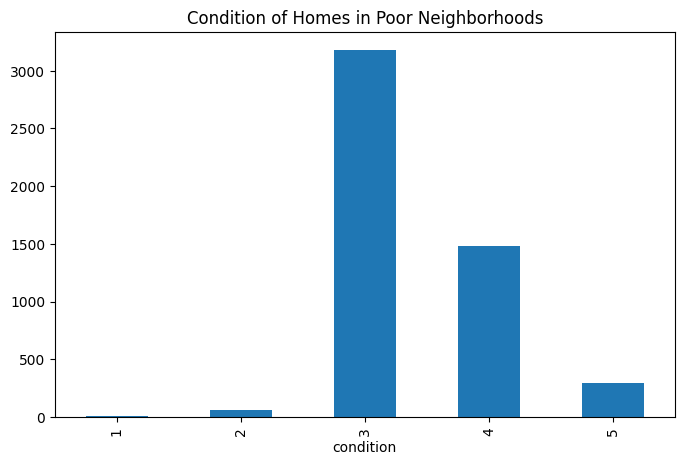

In [ ]:
🔸 Condition countplot (ile domów w jakim stanie w biednych dzielnicach)
To pomaga Erin zrozumieć potencjał remontu.

df[df['poor_neighborhood']]['condition'].value_counts().sort_index().plot(kind='bar')
plt.title("Condition of Homes in Poor Neighborhoods")
plt.show()


In [36]:
df_poor = df[df['poor_neighborhood']]


In [37]:
house_c1 = df_poor[df_poor['condition'] == 1].sort_values('price').head(1)
house_c1


,date,price,house_id,id_x,id_y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,poor_neighborhood,price_per_sqft
15279,2014-05-06,78000.000,40000362,15280,40000362,2.000,1.000,780.000,16344.000,1.000,...,0.000,1942,<NA>,98168,47.474,-122.280,1700.000,10387.000,True,100.000


In [39]:
house_c2 = df_poor[df_poor['condition'] == 2].sort_values('price').head(1)
house_c2


,date,price,house_id,id_x,id_y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,poor_neighborhood,price_per_sqft
2139,2014-05-08,82500.000,1623049041,2140,1623049041,2.000,1.000,520.000,22334.000,1.000,...,0.000,1951,<NA>,98168,47.480,-122.296,1572.000,10570.000,True,158.654


In [40]:
house_c3 = df_poor[df_poor['condition'] == 3].sort_values('price').head(1)
house_c3


,date,price,house_id,id_x,id_y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,poor_neighborhood,price_per_sqft
8267,2014-11-05,82000.000,3883800011,8268,3883800011,3.000,1.000,860.000,10426.000,1.000,...,0.000,1954,<NA>,98146,47.499,-122.341,1140.000,11250.000,True,95.349


In [42]:
cols = [
    'house_id',
    'zipcode',
    'price',
    'condition',
    'sqft_living',
    'bedrooms',
    'bathrooms',
    'price_per_sqft',
    'yr_built'
]

recommended_houses = pd.concat([house_c1, house_c2, house_c3])[cols]
recommended_houses


,house_id,zipcode,price,condition,sqft_living,bedrooms,bathrooms,price_per_sqft,yr_built
15279,40000362,98168,78000.000,1,780.000,2.000,1.000,100.000,1942
2139,1623049041,98168,82500.000,2,520.000,2.000,1.000,158.654,1951
8267,3883800011,98146,82000.000,3,860.000,3.000,1.000,95.349,1954


🤝 PODSUMOWANIE (mega proste)
Najpierw:
policz medianę ceny per ZIP
wybierz biedne ZIPy (dolne 25%)
dodaj kolumnę poor_neighborhood
posortuj tabelę pod klientkę
Potem zrób wizualizacje:
median price per ZIP (bar plot)
boxplot: poor vs not poor
scatter: condition vs price
scatter: sqft vs price w biednych ZIPach
histogramy: price / condition w biednych ZIPach

Plot 1: Median USD per sqft by ZIP Code (shows bottom 10 cheapest and top 10 most expensive ZIPs).
Note: Low values indicate affordable locations in terms of price per area.

10 cheapest ZIPs (USD/sqft):
zipcode
98023   144.970
98032   146.205
98001   147.141
98002   147.177
98092   149.180
98030   152.174
98003   154.819
98031   157.068
98042   159.248
98188   163.897

10 most expensive ZIPs (USD/sqft):
zipcode
98103   360.470
98107   372.801
98040   376.371
98105   391.813
98102   406.364
98119   416.653
98112   424.242
98109   427.696
98004   456.944
98039   565.166


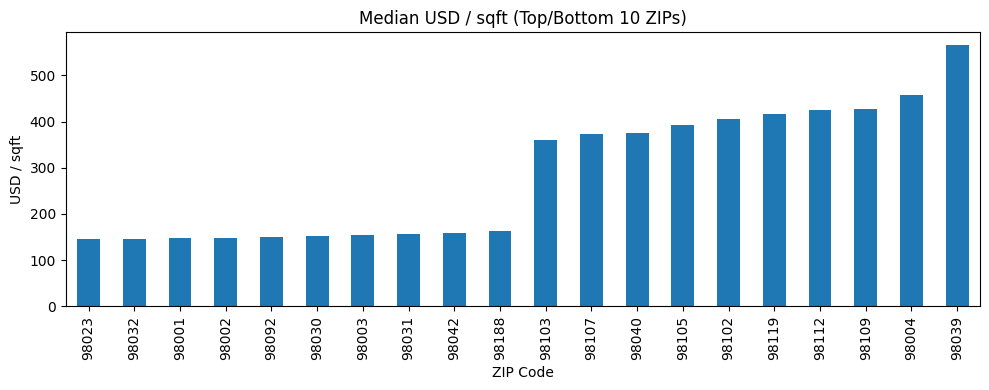

No 'sale_year' column available → Time series skipped.

Plot 3: Price vs. Living area (Sampling).
Sample size used: 2000 records.
Color shows whether the house is in a 'poor' marked ZIP (True = poor).


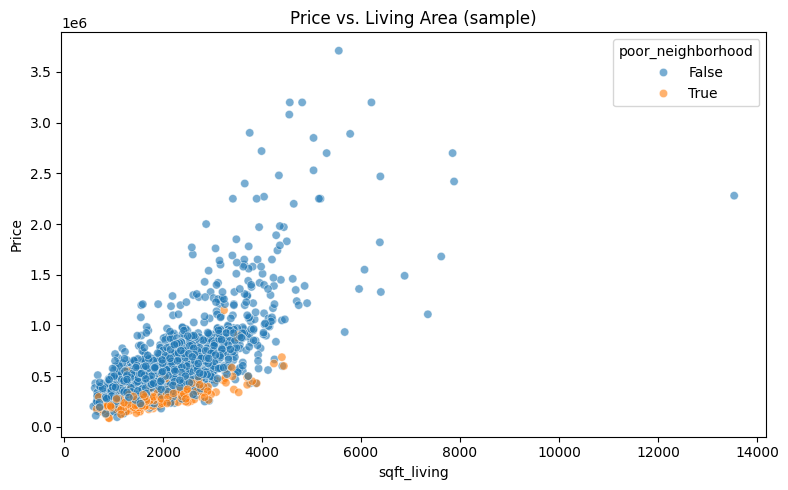


No 'df_clusters' with 'cluster' column found. Cluster visualization skipped.

No cluster data available for candidate selection.


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure price_per_sqft exists
if 'price_per_sqft' not in df.columns:
    df['price_per_sqft'] = df['price'] / df['sqft_living'].replace(0, np.nan)

# 1) Median Price per Sqft: only Top/Bottom 10 ZIPs for overview
pps = df.groupby('zipcode')['price_per_sqft'].median().sort_values()

# Small text output for orientation
print("Plot 1: Median USD per sqft by ZIP Code (shows bottom 10 cheapest and top 10 most expensive ZIPs).")
print("Note: Low values indicate affordable locations in terms of price per area.\n")

pps_display = pd.concat([pps.head(10), pps.tail(10)])
print("10 cheapest ZIPs (USD/sqft):")
print(pps.head(10).to_string())
print("\n10 most expensive ZIPs (USD/sqft):")
print(pps.tail(10).to_string())

plt.figure(figsize=(10,4))
pps_display.plot(kind='bar', color='C0')
plt.title("Median USD / sqft (Top/Bottom 10 ZIPs)")
plt.ylabel("USD / sqft")
plt.xlabel("ZIP Code")
plt.tight_layout()
plt.show()

# 2) Time series: Median price per year (overall) + poor neighborhoods separately
# Check if 'sale_year' exists and has sufficient data
if 'sale_year' in df.columns:
    yearly = df.groupby('sale_year')['price'].median()
    poor_yearly = df[df['poor_neighborhood']].groupby('sale_year')['price'].median()

    print("\nPlot 2: Median price per year (overall) and separately for 'poor' ZIPs.")
    print("Annual data (overall):")
    print(yearly.to_string())
    if len(poor_yearly) > 0:
        print("\nAnnual data (poor ZIPs):")
        print(poor_yearly.to_string())
    else:
        print("\nNo annual data available for 'poor' ZIPs.")

    plt.figure(figsize=(8,4))
    plt.plot(yearly.index, yearly.values, marker='o', label='All')
    if len(poor_yearly) > 0:
        plt.plot(poor_yearly.index, poor_yearly.values, marker='o', label='Poor ZIPs')
    plt.title("Median Price per Year")
    plt.xlabel("Year")
    plt.ylabel("Median Price")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No 'sale_year' column available → Time series skipped.")

# 3) Scatter: Price vs. Living Area (small random sample)
sample_size = min(2000, len(df))
sample = df.sample(sample_size, random_state=1)

print("\nPlot 3: Price vs. Living area (Sampling).")
print(f"Sample size used: {sample_size} records.")
print("Color shows whether the house is in a 'poor' marked ZIP (True = poor).")

plt.figure(figsize=(8,5))
sns.scatterplot(x='sqft_living', y='price', hue='poor_neighborhood', data=sample, alpha=0.6)
plt.title("Price vs. Living Area (sample)")
plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

# 4) Cluster plot if 'cluster' exists (simple view)
# Check if df_clusters exists and has the required columns
if 'df_clusters' in globals() and 'cluster' in df_clusters.columns:
    print("\nPlot 4: Cluster visualization (price_per_sqft vs sqft_living15) — only if df_clusters available.")
    sample2 = df_clusters.sample(min(2000, len(df_clusters)), random_state=2)

    plt.figure(figsize=(8,5))
    sns.scatterplot(x='price_per_sqft', y='sqft_living15', hue='cluster', data=sample2, palette='tab10', alpha=0.7)
    plt.title("Cluster: price_per_sqft vs sqft_living15 (sample)")
    plt.xlabel("Price per sqft")
    plt.ylabel("sqft_living15")
    plt.legend(title='cluster', bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()
else:
    print("\nNo 'df_clusters' with 'cluster' column found. Cluster visualization skipped.")

# Simple candidate selection for Erin:
# Heuristic: Cluster with low median price_per_sqft and relatively high sqft_living15
if 'df_clusters' in globals() and 'cluster' in df_clusters.columns:
    print("\nCandidate selection: Search for clusters with affordable USD/sqft and large living area in the neighborhood (sqft_living15).")
    summary = df_clusters.groupby('cluster')[['price_per_sqft','sqft_living15']].median()
    # Score: low price_per_sqft positive, large sqft_living15 positive
    summary['score'] = (-summary['price_per_sqft']) + (summary['sqft_living15'] / 1000.0)
    print("Cluster summary (median values and score):")
    print(summary.sort_values('score', ascending=False).to_string())

    best_cluster = summary['score'].idxmax()
    print("\nSelected cluster for Erin (highest score):", best_cluster)

    candidates = df_clusters[df_clusters['cluster']==best_cluster].sort_values('price_per_sqft').head(10)
    display_cols = ['price','price_per_sqft','sqft_living','sqft_living15','zipcode','lat','long']
    print("Top 10 candidates (affordable per sqft, lots of living space) — first rows:")
    display(candidates[display_cols])
else:
    print("\nNo cluster data available for candidate selection.")
